<a href="https://colab.research.google.com/github/kashish85/AIMLMonth2023/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem statement- Customer Churn Prediction for a Telecommunications Company using Machine Learning in Python***

**Steps Involved to Predict Customer Churn**

*   Importing Libraries
*   Loading Dataset
*   Exploratory Data Analysis
*   Outliers using IQR method
*   Cleaning and Transforming Data
1.  One-hot Encoding
2.  Rearranging Columns
3.  Feature Scaling
4.  Feature Selection
*   Prediction using Logistic Regression
*   Prediction using Support Vector Classifier
*   Prediction using Decision Tree Classifier
*   Prediction using KNN Classifier
*   Ada Boost Classifier
*   Gradient Boosting Classifier
*   Stochastic Gradient Boosting (SGB) Classifier
*   XGB Classifier
*   Neural Networks



**Importing The Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sklearn
import matplotlib




**Importing the Dataset**

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

**Exploratory Data Analysis**

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df=df.drop(columns=['customerID'])

In [ ]:
df.size

140860

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.duplicated().sum()

22

In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
print(df['gender'].unique())
print(df['SeniorCitizen'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique())
print(df['tenure'].unique())
print(df['PhoneService'].unique())
print(df['MultipleLines'].unique())
print(df['InternetService'].unique())
print(df['OnlineSecurity'].unique())
print(df['OnlineBackup'].unique())
print(df['DeviceProtection'].unique())
print(df['TechSupport'].unique())
print(df['StreamingTV'].unique())
print(df['StreamingMovies'].unique())
print(df['Contract'].unique())
print(df['PaperlessBilling'].unique())
print(df['PaymentMethod'].unique())
print(df['MonthlyCharges'].unique())
print(df['TotalCharges'].unique())
print(df['Churn'].unique())


['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


**Basic Data Cleaning**

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

In [ ]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [ ]:
df1.skew(numeric_only= True)

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [ ]:
df1.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


**Feature distribution**


*Numerical features distribution*



In [ ]:
df1[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

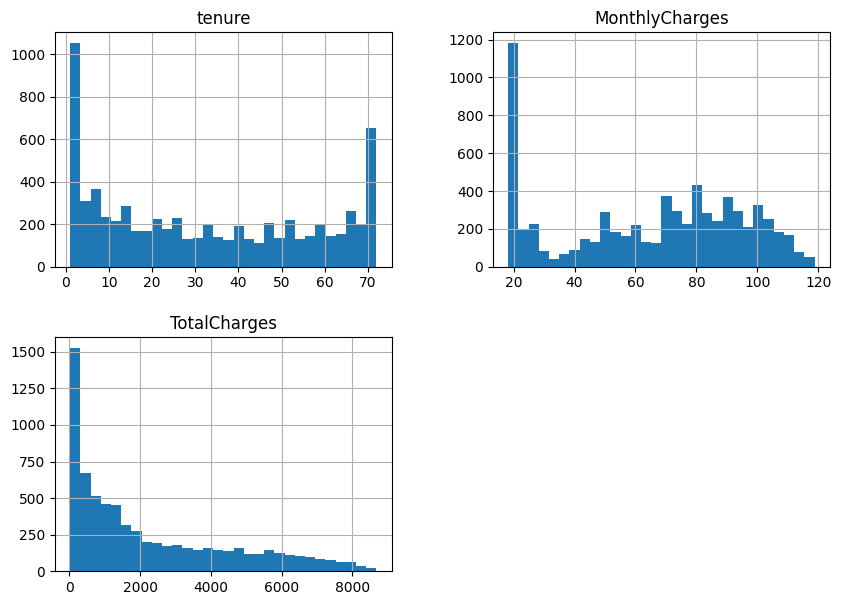

In [ ]:
df1[numerical_features].hist(bins=30, figsize=(10, 7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

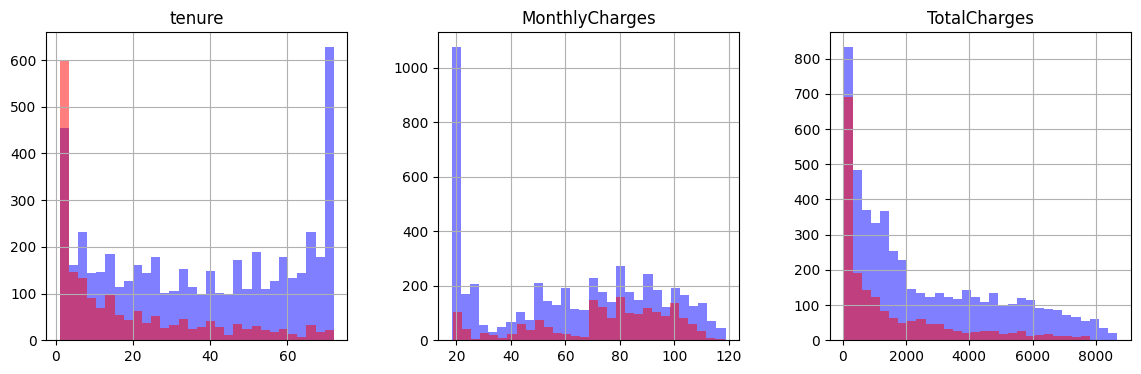

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df1[df1.Churn == "No"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df1[df1.Churn == "Yes"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

*Categorical feature distribution*

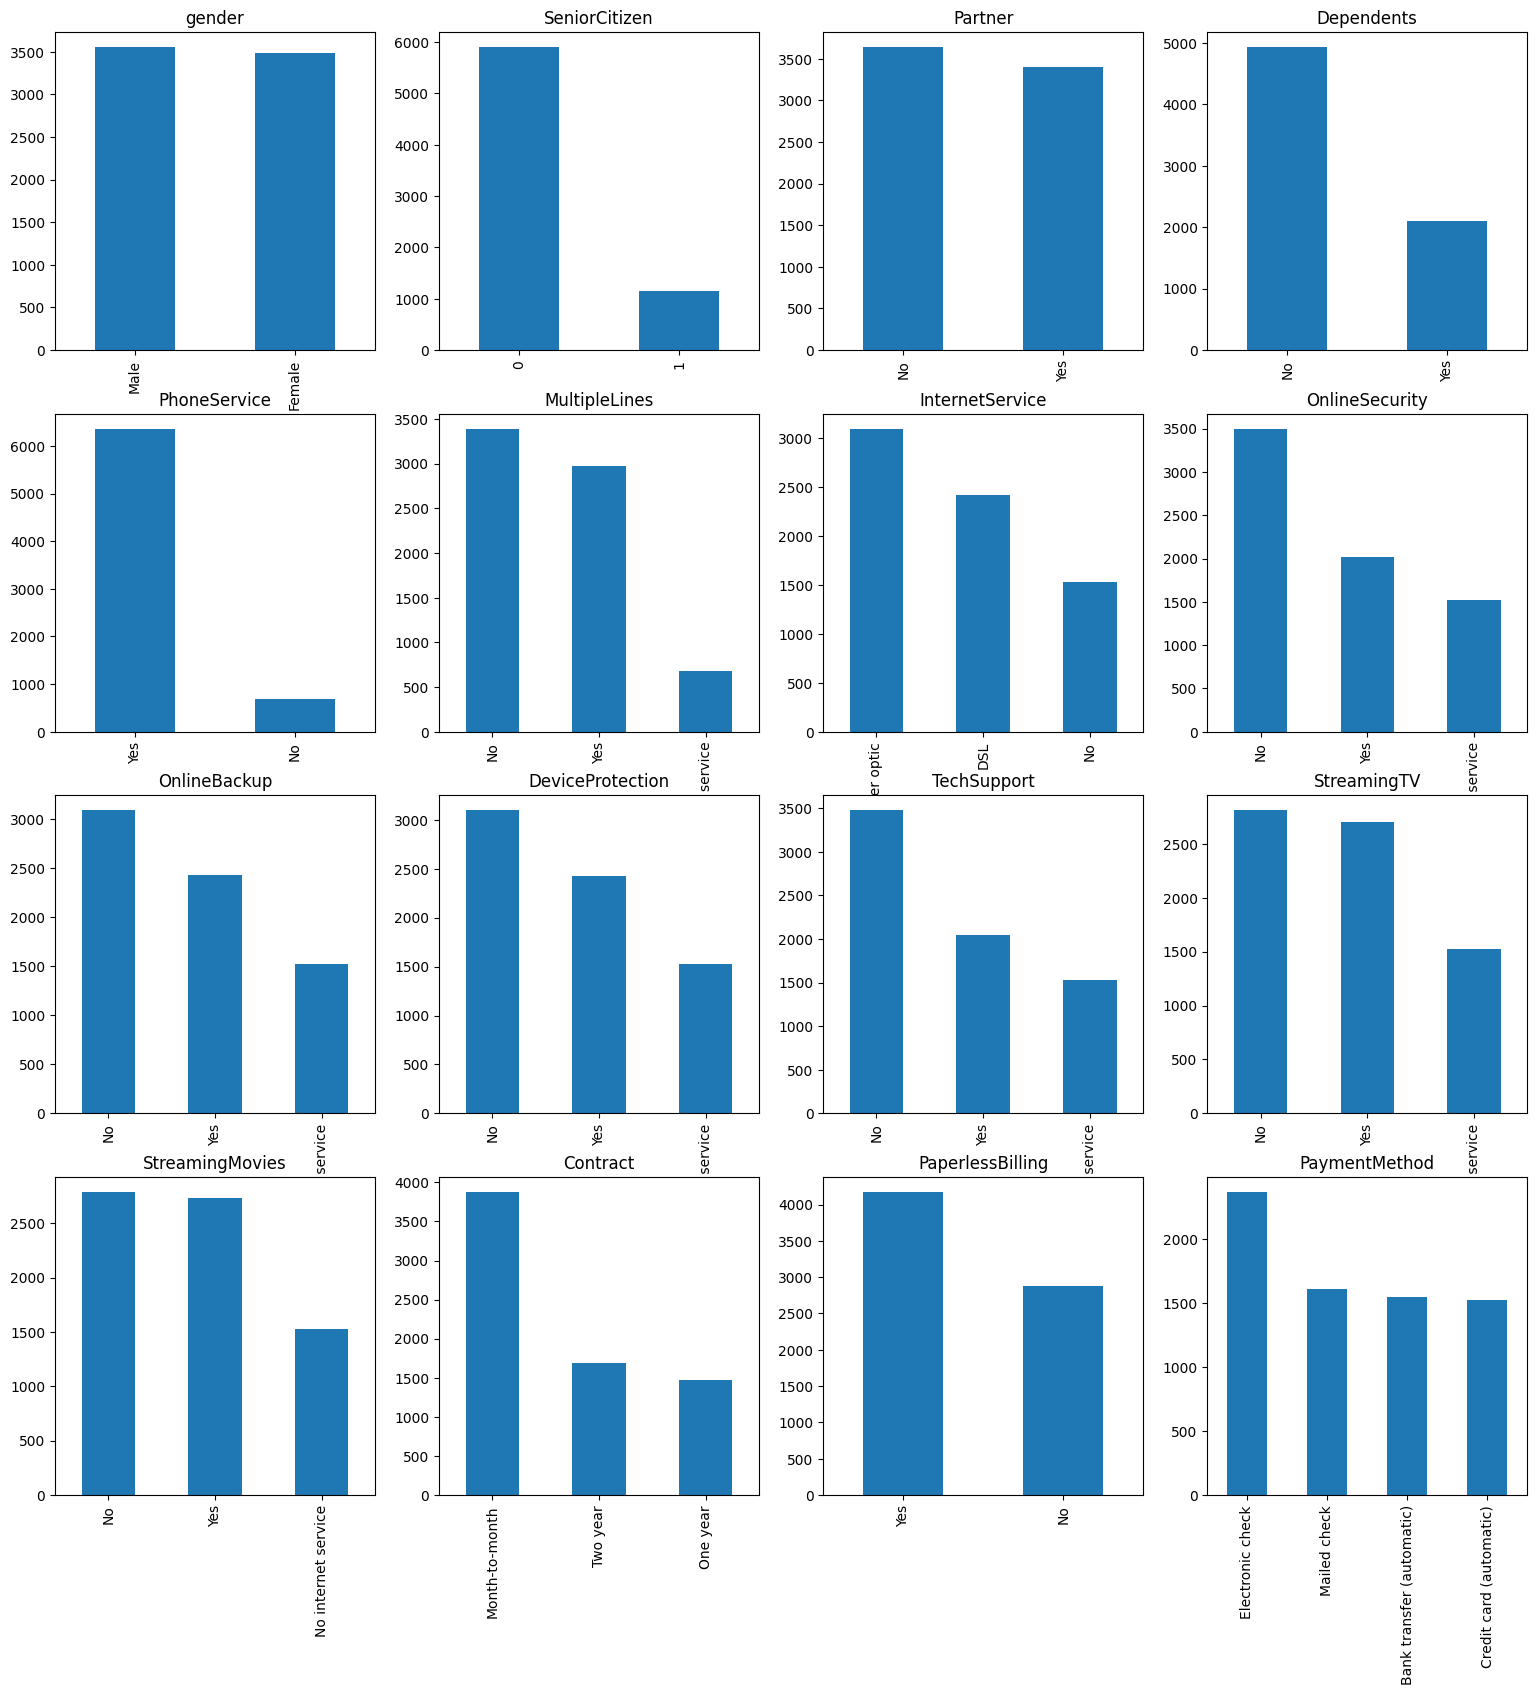

In [ ]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

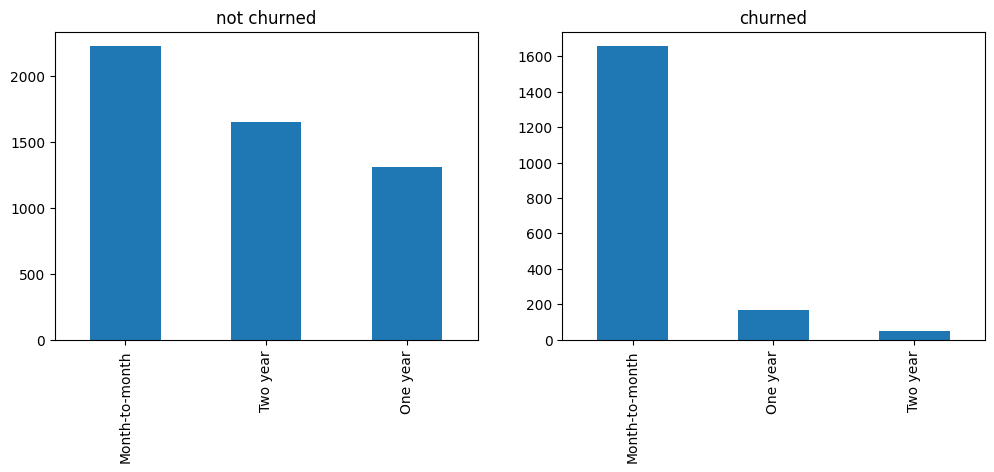

In [ ]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df[df.Churn == "No"][feature].value_counts().plot(kind='bar', ax=ax[0]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='bar', ax=ax[1]).set_title('churned')

**Target variable distribution**

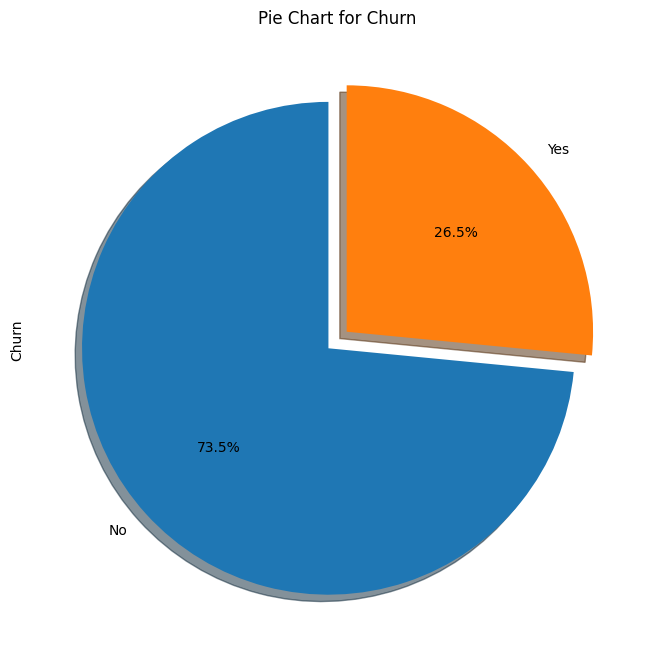

In [ ]:
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='count'>

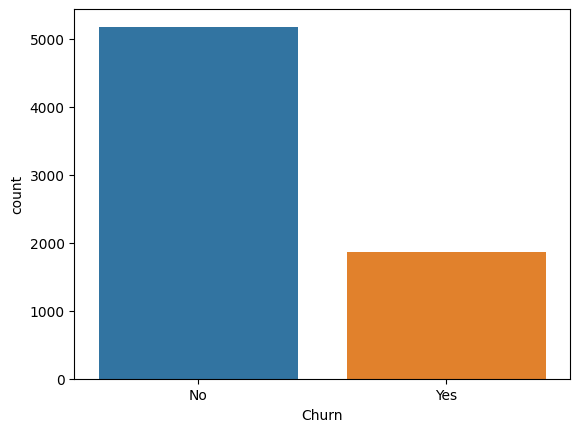

In [ ]:
sns.countplot(x=df.Churn)

**Outliers Analysis with IQR Method**

In [ ]:
x = ['tenure','MonthlyCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

No outliers in tenure
No outliers in MonthlyCharges


**On Hot Encoding**

In [ ]:
df1=pd.get_dummies(data=df,columns=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])

In [ ]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.5,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
df1.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

**Rearranging Columns**

In [ ]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn_Yes']]

In [ ]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.5,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
df1['TotalCharges'].dtype

dtype('O')

In [ ]:
df1['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

In [ ]:
df1['TotalCharges'].dtype

dtype('float64')

In [ ]:
df1.shape

(7043, 31)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="constant")
df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
non_numeric_columns = df1.select_dtypes(exclude=['float64', 'int64']).columns
for col in non_numeric_columns:
    df1[col].fillna(df1[col].mode()[0], inplace=True)

scaler = StandardScaler()

numeric_columns = df1.select_dtypes(include=['float64', 'int64']).columns
scaled_features = scaler.fit_transform(df1[numeric_columns])


In [ ]:
for col in df1.columns:
    unique_values = df1[col].unique()
    print(f"Column {col}: {unique_values}")

Column SeniorCitizen: [0 1]
Column tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Column gender_Male: [0 1]
Column Partner_Yes: [1 0]
Column Dependents_Yes: [0 1]
Column PhoneService_Yes: [0 1]
Column MultipleLines_No phone service: [1 0]
Column MultipleLines_Yes: [0 1]
Column InternetService_Fiber optic: [0 1]
Column InternetService_No: [0 1]
Column OnlineSecurity_No internet service: [0 1]
Column OnlineSecurity_Yes: [0 1]
Column OnlineBackup_No internet service: [0 1]
Column OnlineBackup_Yes: [1 0]
Column DeviceProtection_No internet service: [0 1]
Column DeviceProtection_Yes: [0 1]
Column TechSupport_No internet service: [0 1]
Column TechSupport_Yes: [0 1]
Column 

In [ ]:
print(df1.dtypes)

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in df1.columns:
    if col != 'Churn_Yes':
        try:
            scaled_column = scaler.fit_transform(df1[[col]])
            print(f"Scaled {col} successfully.")
        except ValueError as e:
            print(f"Error scaling {col}: {e}")


Scaled SeniorCitizen successfully.
Scaled tenure successfully.
Scaled MonthlyCharges successfully.
Scaled TotalCharges successfully.
Scaled gender_Male successfully.
Scaled Partner_Yes successfully.
Scaled Dependents_Yes successfully.
Scaled PhoneService_Yes successfully.
Scaled MultipleLines_No phone service successfully.
Scaled MultipleLines_Yes successfully.
Scaled InternetService_Fiber optic successfully.
Scaled InternetService_No successfully.
Scaled OnlineSecurity_No internet service successfully.
Scaled OnlineSecurity_Yes successfully.
Scaled OnlineBackup_No internet service successfully.
Scaled OnlineBackup_Yes successfully.
Scaled DeviceProtection_No internet service successfully.
Scaled DeviceProtection_Yes successfully.
Scaled TechSupport_No internet service successfully.
Scaled TechSupport_Yes successfully.
Scaled StreamingTV_No internet service successfully.
Scaled StreamingTV_Yes successfully.
Scaled StreamingMovies_No internet service successfully.
Scaled StreamingMovies

In [ ]:
scaler.fit(df1.drop(['Churn_Yes'],axis = 1))
scaled_features = scaler.transform(df1.drop('Churn_Yes',axis = 1))

**Feature Selection**

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_features
Y = df1['Churn_Yes']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

**Prediction using logistic Regression **

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
predLR = logmodel.predict(X_test)

In [ ]:
predLR

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
Y_test

5616    0
2937    0
1355    0
5441    1
3333    0
       ..
2797    1
412     0
174     0
5761    0
5895    0
Name: Churn_Yes, Length: 2113, dtype: uint8

In [ ]:
print(classification_report(Y_test, predLR))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1557
           1       0.65      0.53      0.58       556

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



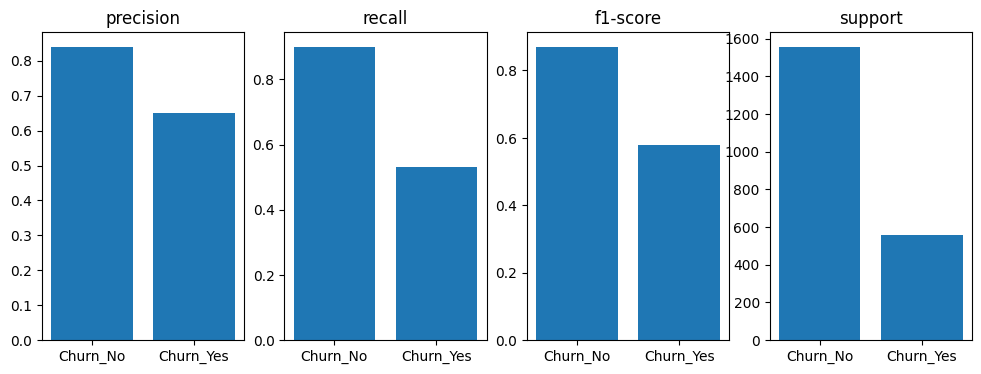

In [ ]:
report = classification_report(Y_test, predLR, target_names=['Churn_No', 'Churn_Yes'])

lines = report.split('\n')

parts = [line.split() for line in lines[2:-5]]

class_metrics = dict()
for part in parts:
    class_metrics[part[0]] = {'precision': float(part[1]), 'recall': float(part[2]), 'f1-score': float(part[3]), 'support': int(part[4])}

fig, ax = plt.subplots(1, 4, figsize=(12, 4))
metrics = ['precision', 'recall', 'f1-score', 'support']
for i, metric in enumerate(metrics):
    ax[i].bar(class_metrics.keys(), [class_metrics[key][metric] for key in class_metrics.keys()])
    ax[i].set_title(metric)

plt.show()


In [ ]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

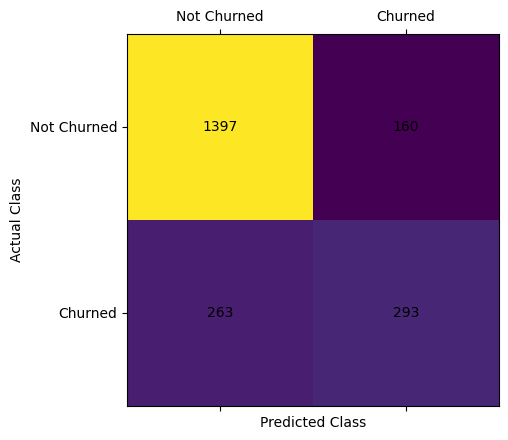

In [ ]:
plt.matshow(confusion_matrix(Y_test, predLR))

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')

plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
logmodel.score(X_train, Y_train)

0.8058823529411765

In [ ]:
accuracy_score(Y_test, predLR)

0.7998106956933271

**Prediction using Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1557
           1       0.67      0.47      0.56       556

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113



In [ ]:
confusion_matrix_svc = confusion_matrix(Y_test, y_pred_svc)

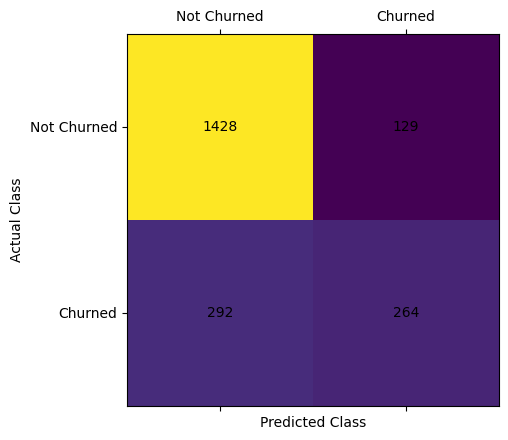

In [ ]:
plt.matshow(confusion_matrix_svc)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')

plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
svc.score(X_train,Y_train)

0.8168356997971602

In [ ]:
accuracy_score(Y_test, y_pred_svc)

0.8007572172266919

**Prediction using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1557
           1       0.47      0.49      0.48       556

    accuracy                           0.72      2113
   macro avg       0.64      0.65      0.64      2113
weighted avg       0.72      0.72      0.72      2113



In [ ]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

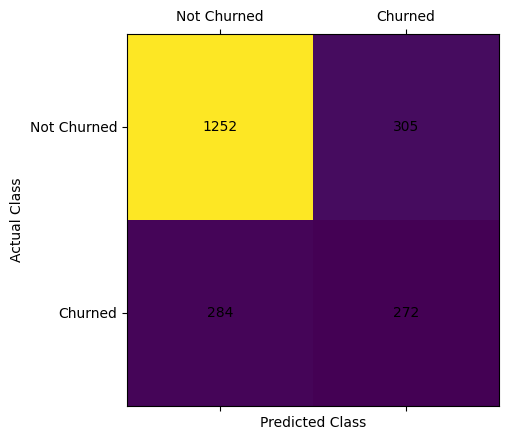

In [ ]:
plt.matshow(confusion_matrix_dtc)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')

plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
dtc.score(X_train,Y_train)

0.9987829614604462

In [ ]:
accuracy_score(Y_test, y_pred_dtc)

0.7212494084240416

Prediction using KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

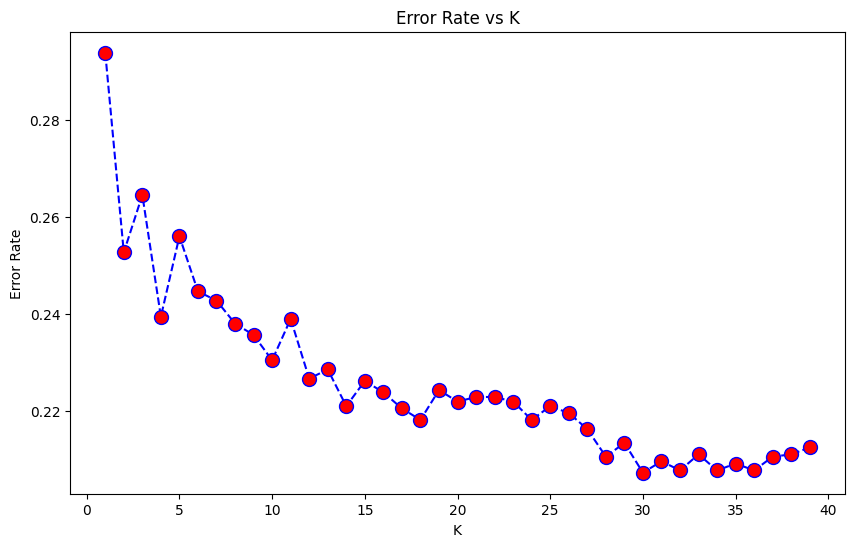

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1557
           1       0.62      0.55      0.58       556

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [ ]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

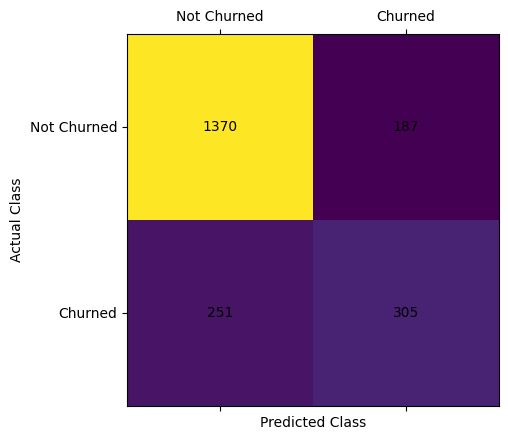

In [ ]:
plt.matshow(confusion_matrix_knn)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
knn.score(X_train,Y_train)

0.8008113590263691

In [ ]:
accuracy_score(Y_test, pred_knn)

0.7927117841930904

**Ada Boost classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X = df1.drop('Churn_Yes', axis=1)
y = df1['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_classifier.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred_proba = ada_classifier.predict_proba(X_test_scaled)

In [ ]:
y_pred_scores = ada_classifier.predict_proba(X_test_scaled)
predicted_churn_scores = y_pred_scores[:, 1]

In [ ]:
y_pred = (predicted_churn_scores > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
train_score = ada_classifier.score(X_train_scaled, y_train)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[935 101]
 [153 220]]


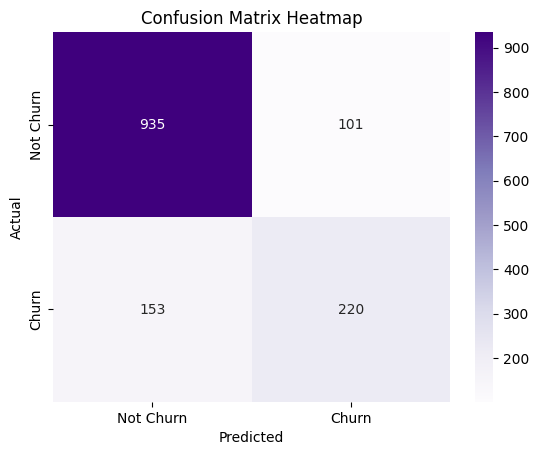

In [ ]:
conf_matrix_heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
                                   xticklabels=['Not Churn', 'Churn'],
                                   yticklabels=['Not Churn', 'Churn'])
conf_matrix_heatmap.set_xlabel('Predicted')
conf_matrix_heatmap.set_ylabel('Actual')
conf_matrix_heatmap.set_title('Confusion Matrix Heatmap')

plt.show()

In [ ]:
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8197303051809794


In [ ]:
print("Training Score:", train_score)

Training Score: 0.8047568335108272


In [ ]:
print(predicted_churn_scores)

[0.50546381 0.49019282 0.47879454 ... 0.47898553 0.48371229 0.50463199]


***Gradient Boosting Classifier ***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X = df1.drop('Churn_Yes', axis=1)
y = df1['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred_scores = gb_classifier.predict_proba(X_test_scaled)

In [ ]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [ ]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[935 101]
 [153 220]]


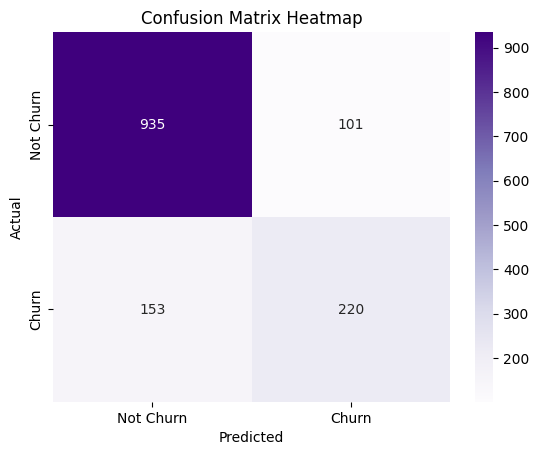

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
                                   xticklabels=['Not Churn', 'Churn'],
                                   yticklabels=['Not Churn', 'Churn'])
conf_matrix_heatmap.set_xlabel('Predicted')
conf_matrix_heatmap.set_ylabel('Actual')
conf_matrix_heatmap.set_title('Confusion Matrix Heatmap')

plt.show()

In [ ]:
train_score = gb_classifier.score(X_train_scaled, y_train)
print("Training Score:", train_score)

Training Score: 0.8257011004614838


In [ ]:
y_pred = (y_pred_scores[:, 1] > 0.5).astype(int)
print("Predicted :", y_pred)

Predicted : [1 0 0 ... 0 0 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8069552874378992


**Stochastic Gradient Boosting (SGB) Classifier**

In [ ]:
X = df1.drop('Churn_Yes', axis=1)
y = df1['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
sgb_classifier = GradientBoostingClassifier(n_estimators=100, subsample=0.8, max_features=0.8, random_state=42)
sgb_classifier.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_features=0.8, random_state=42, subsample=0.8)

In [ ]:
y_pred_scores = sgb_classifier.predict_proba(X_test_scaled)
predicted_churn_scores = y_pred_scores[:, 1]

In [ ]:
y_pred = (predicted_churn_scores > 0.5).astype(int)

In [ ]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [ ]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[935 101]
 [153 220]]


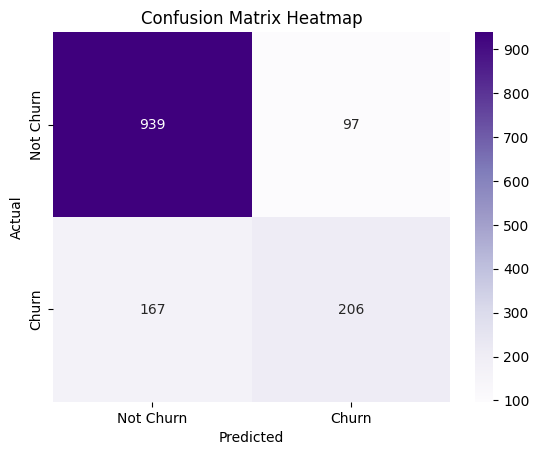

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
                                   xticklabels=['Not Churn', 'Churn'],
                                   yticklabels=['Not Churn', 'Churn'])
conf_matrix_heatmap.set_xlabel('Predicted')
conf_matrix_heatmap.set_ylabel('Actual')
conf_matrix_heatmap.set_title('Confusion Matrix Heatmap')

plt.show()

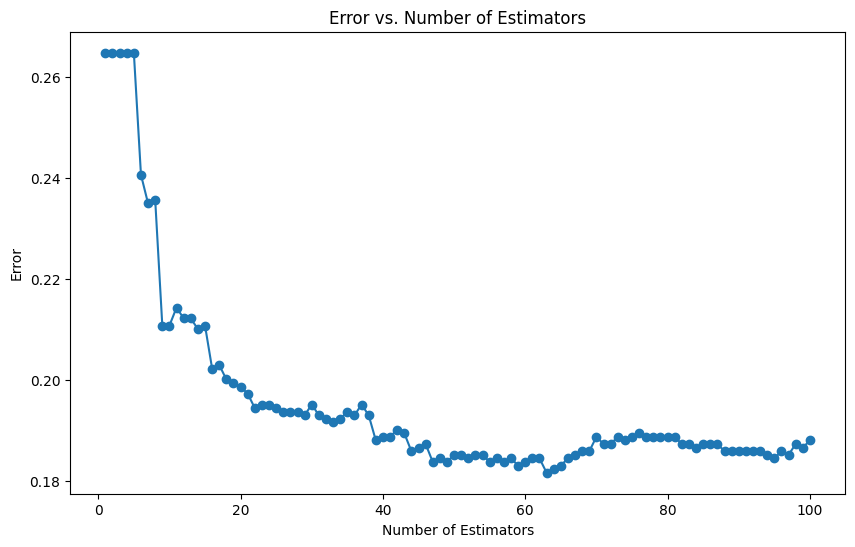

In [ ]:
errors = []
estimators_range = range(1, 101)
for n_estimators in estimators_range:
    sgb = GradientBoostingClassifier(n_estimators=n_estimators, subsample=0.8, max_depth=3, random_state=42)
    sgb.fit(X_train, y_train)
    y_pred = sgb.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(estimators_range, errors, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Error vs. Number of Estimators')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8119233498935415


In [ ]:
test_score = sgb_classifier.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Test Score: 0.8126330731014905


In [ ]:
train_score = sgb_classifier.score(X_train_scaled, y_train)
print("Training Score:", train_score)

Training Score: 0.8260560880369187


In [ ]:
print("Predicted Churn Scores:")
print(predicted_churn_scores)

Predicted Churn Scores:
[0.7464121  0.08715479 0.01841563 ... 0.0427538  0.03930124 0.66062286]


**XGB Boost Classifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = df1.drop('Churn_Yes', axis=1)
y = df1['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
train_score = xgb_classifier.score(X_train_scaled, y_train)

In [ ]:
test_score = xgb_classifier.score(X_test_scaled, y_test)

In [ ]:
y_pred_scores = xgb_classifier.predict_proba(X_test_scaled)
predicted_churn_scores = y_pred_scores[:, 1]

In [ ]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [ ]:
accuracy_percentage = accuracy * 100

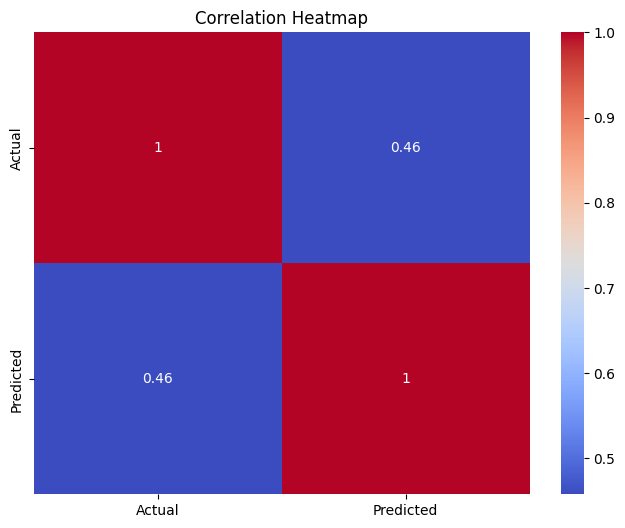

In [ ]:
correlation_matrix = result_df.corr()
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm' )
heatmap.set_title('Correlation Heatmap')
plt.show()

In [ ]:
print("Training Score:", train_score)

Training Score: 0.9359247426340078


In [ ]:
print("Predicted Score:", predicted_churn_scores)

Predicted Score: [0.8498854  0.05294956 0.01534344 ... 0.02888322 0.00382496 0.50496686]


In [ ]:
print("Test Score:", test_score)

Test Score: 0.7991483321504613


In [ ]:
print("Accuracy:", accuracy_percentage)

Accuracy: 79.91483321504613


**Neural Networks**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
X = df1.drop('Churn_Yes', axis=1)
y = df1['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
141/141 [==============================] - 2s 5ms/step - loss: 0.4748 - accuracy: 0.7650 - val_loss: 0.4206 - val_accuracy: 0.8012
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4395 - accuracy: 0.7888 - val_loss: 0.4136 - val_accuracy: 0.8057
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7919 - val_loss: 0.4063 - val_accuracy: 0.8083
Epoch 4/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.8003 - val_loss: 0.4105 - val_accuracy: 0.8057
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4253 - accuracy: 0.7983 - val_loss: 0.4133 - val_accuracy: 0.8030
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.7988 - val_loss: 0.4115 - val_accuracy: 0.8039
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8014 - val_loss: 0.4158 - val_accuracy: 0.8030

In [ ]:
train_accuracy = history.history['accuracy'][-1]

In [ ]:
predicted_scores = model.predict(X_test_scaled)

45/45 [==============================] - 0s 1ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8119


In [ ]:
predicted_labels = (predicted_scores > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, predicted_labels)

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

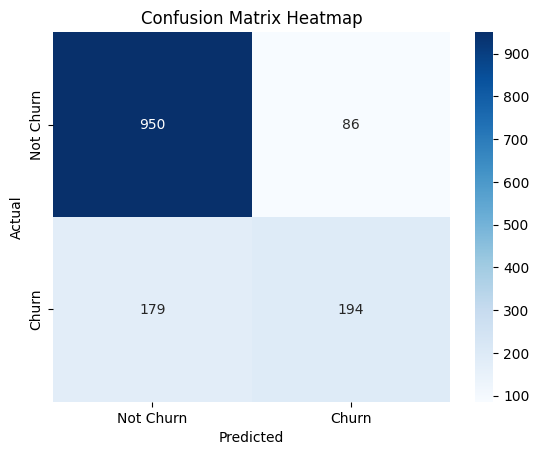

In [ ]:
conf_matrix_heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                                   xticklabels=['Not Churn', 'Churn'],
                                   yticklabels=['Not Churn', 'Churn'])
conf_matrix_heatmap.set_xlabel('Predicted')
conf_matrix_heatmap.set_ylabel('Actual')
conf_matrix_heatmap.set_title('Confusion Matrix Heatmap')

plt.show()

In [ ]:
print("Predicted Scores:", predicted_scores.flatten())

Predicted Scores: [0.58325225 0.089936   0.00556707 ... 0.03811254 0.00981477 0.40652114]


In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.8119233498935415


In [ ]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8119233250617981


In [ ]:
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8096294403076172


**Visual Representation**

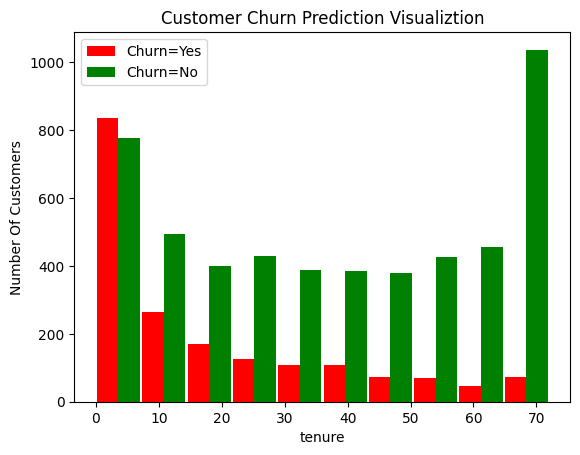

In [ ]:
tenure_churn_no = df1[df.Churn=='No'].tenure
tenure_churn_yes = df1[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

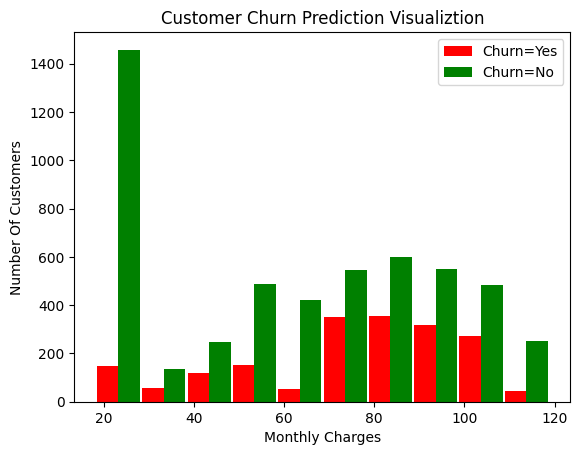

In [ ]:
mc_churn_no = df1[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

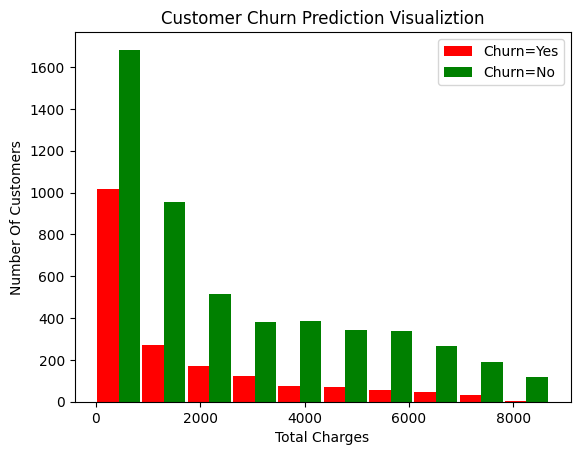

In [ ]:
mc_churn_no = df1[df.Churn=='No'].TotalCharges
mc_churn_yes = df1[df.Churn=='Yes'].TotalCharges

plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Text(0.5, 1.0, 'Correlation Heatmap')

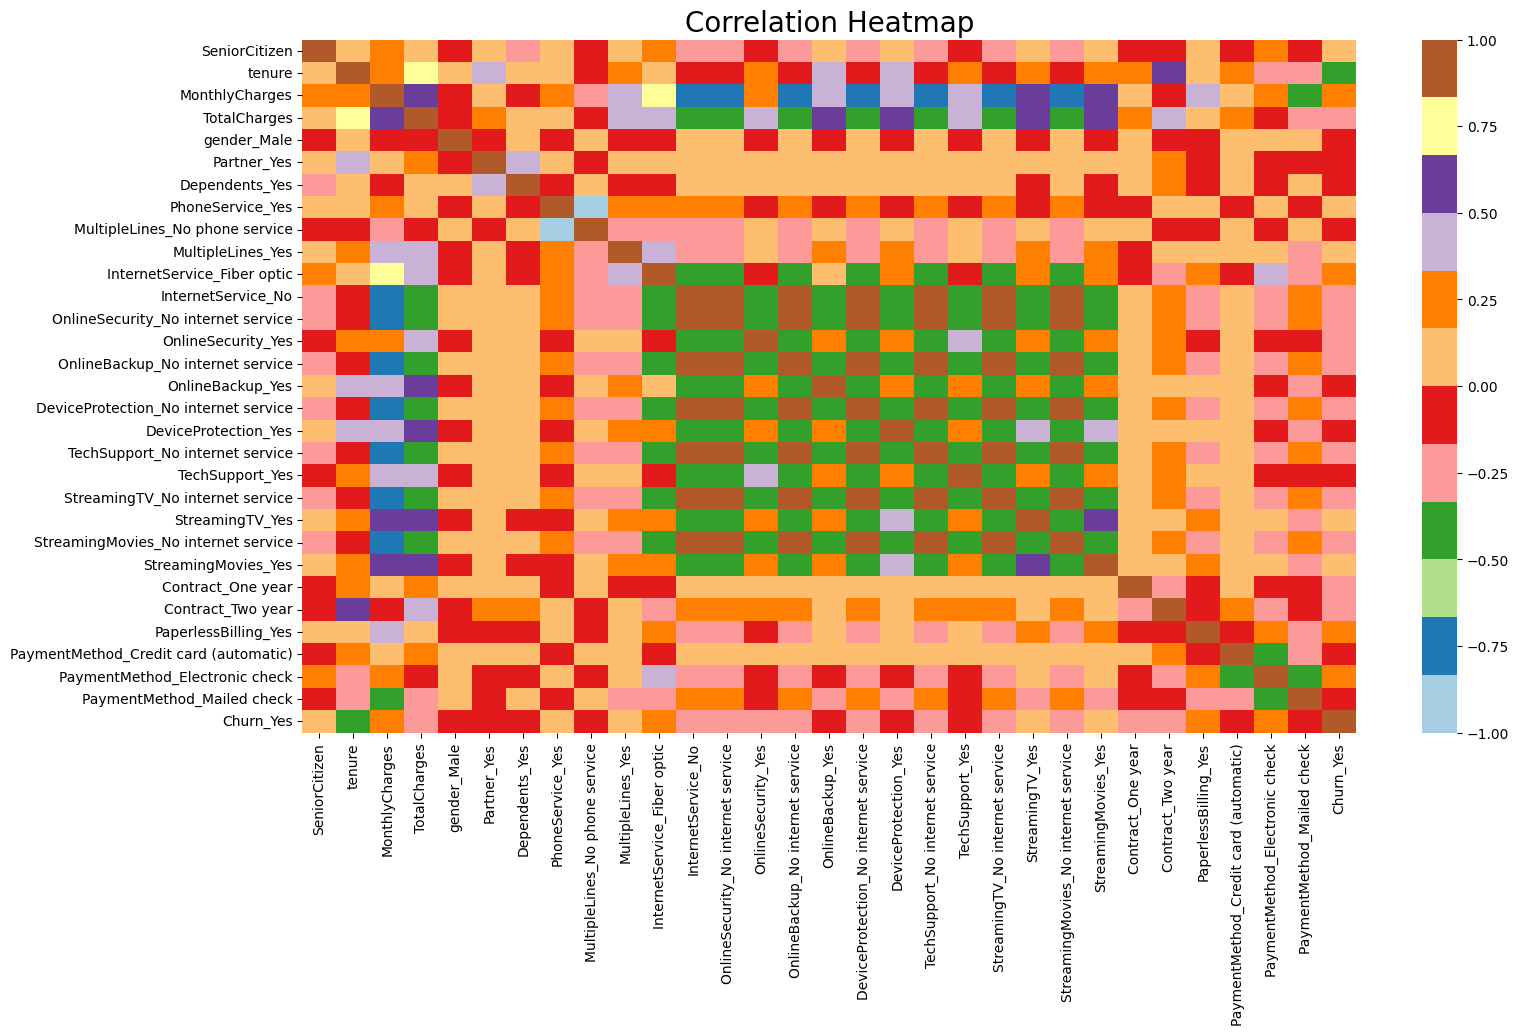

In [ ]:
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})
plt.figure(figsize=(17,9))
sns.heatmap(df1.corr(), cmap="Paired",annot=False)
plt.title("Correlation Heatmap", fontsize=20)

Text(0.5, 1.0, 'Correlation Heatmap')

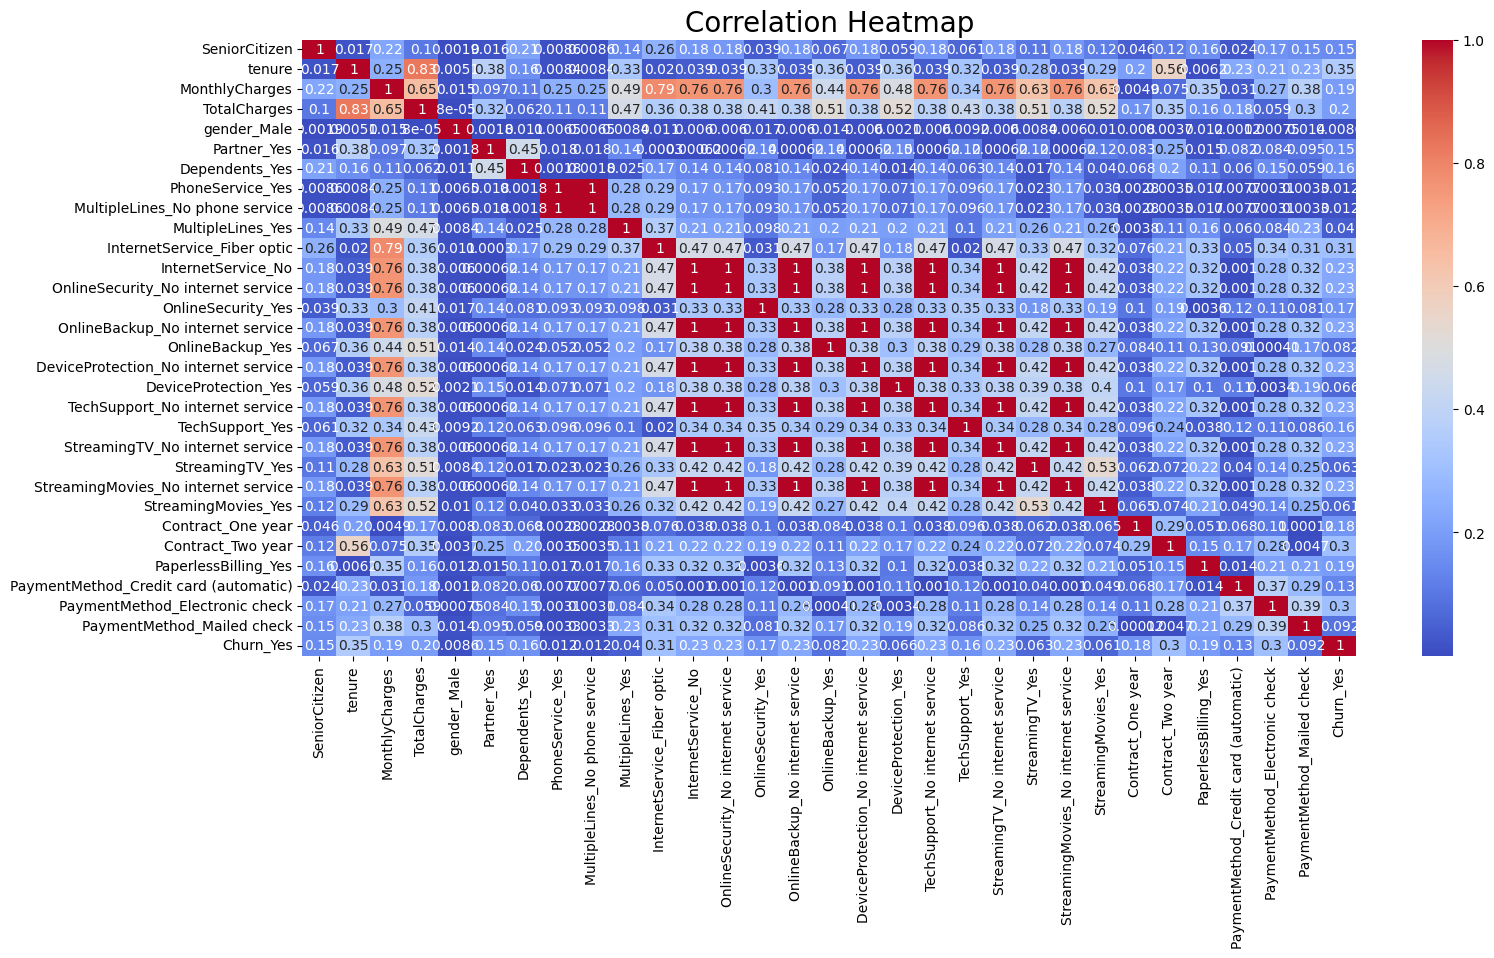

In [ ]:
plt.figure(figsize=(17,8))
correlation=df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=20)